# Decision Tree Worksheet


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install graphviz
import graphviz
import matplotlib.pyplot as plt

/bin/sh: apt-get: command not found


#### Load pima indians diabetes dataset below

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data_frame = pd.read_csv(url,names=names)

#### create training and testing dataset with sklearn function: train_test_split

In [41]:
# your code here
X = data_frame.drop(['class'],axis=1)
y = data_frame['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#### Create a model with sklearn's DecisionTreeClassifier and predict values on your test set

In [26]:
# your code here
model = DecisionTreeClassifier(max_depth=4,random_state=0)

model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy
hint: there is an sklearn to calculate accuracy

In [27]:
# your code here
y_train_predict = model.predict(X_train)
y_val_predict = model.predict(X_val)

print("Training Accuracy: {:01.3f}".format(accuracy_score(y_train, y_train_predict)))
print("Validation Accuracy: {:01.3f}".format(accuracy_score(y_val, y_val_predict)))

Training Accuracy: 0.826
Validation Accuracy: 0.707


#### Use graphviz to view the decision tree graph
##### hint: want to look at a code example, see the Classification Evaluation notebook on github

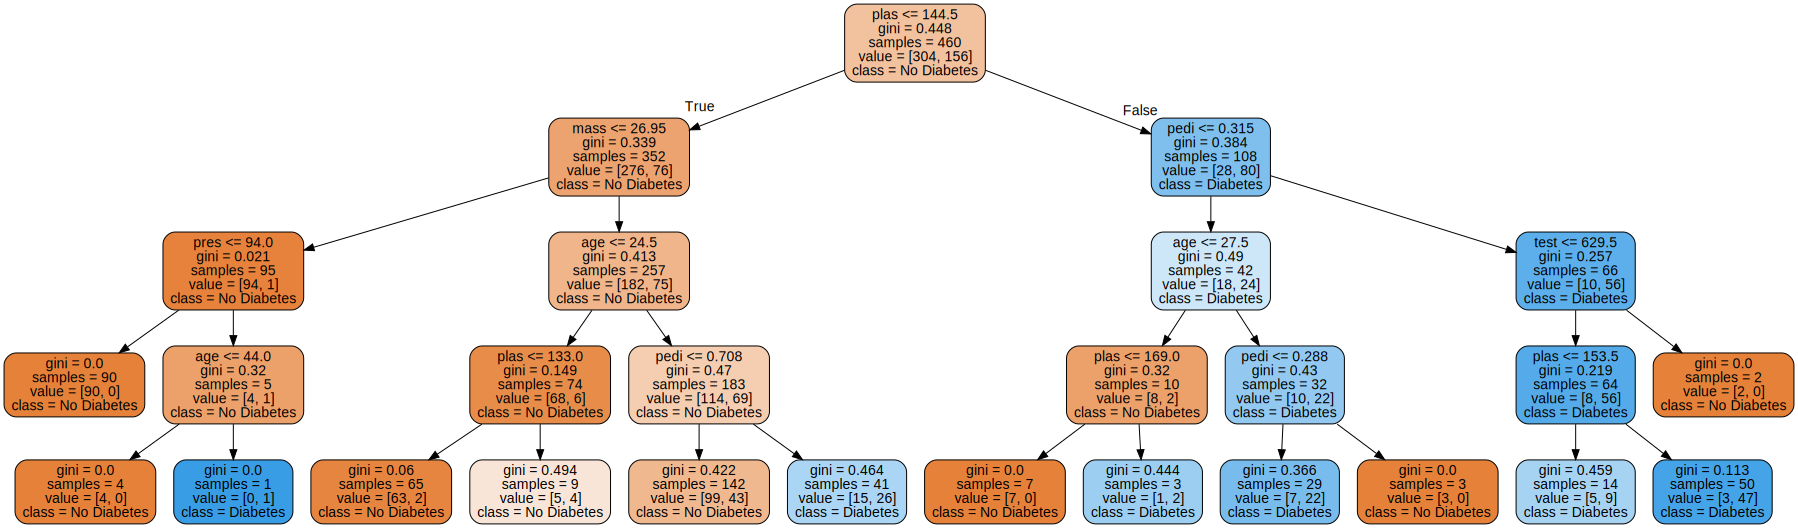

In [31]:
# your code here
graph_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=names[:-1],  
                         class_names=['No Diabetes','Diabetes'],  
                         filled=True, rounded=True,
                         max_depth=4)

graph = graphviz.Source(graph_data)
graph

#### Use the graph above to answer the questions below

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

Your answer here <br>

Question 2: What do you think X[n] represents in the nodes from the graph? <br>

Your answer here <br>

Question 3: What is the root feature? Does it make sense as the root feature?

Your answer here <br>

#### If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Your answer here <br>

#### Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and test data <br>
you only need to predict part of the training data

In [55]:
# your code here
model_overfit = DecisionTreeClassifier(max_depth=500,random_state=0,min_samples_leaf=1)

model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_val_predict = model.predict(X_val)
y_test_predict = model.predict(X_test)
print("Training Accuracy: {:01.3f}".format(accuracy_score(y_train,y_train_predict)))
print("Validation Accuracy: {:01.3f}".format(accuracy_score(y_val,y_val_predict)))
print("Test Accuracy: {:01.3f}".format(accuracy_score(y_test,y_test_predict)))

Training Accuracy: 0.976
Validation Accuracy: 0.750
Test Accuracy: 0.776


# Random Forest

#### Create a model with sklearn's RandomForestClassifier and predict values on your test set

In [53]:
# your code here
X = data_frame.drop(['class'],axis=1)
y = data_frame['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0)

model = RandomForestClassifier(n_estimators=9,random_state=0,criterion='entropy',max_features=None,
                               min_samples_split=5)
model.fit(X_train,y_train)

y_train_predict = model.predict(X_train)
y_val_predict = model.predict(X_val)

print("Training Accuracy: {:01.3f}".format(accuracy_score(y_train,y_train_predict)))
print("Validation Accuracy: {:01.3f}".format(accuracy_score(y_val,y_val_predict)))

Training Accuracy: 0.976
Validation Accuracy: 0.750


#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy<br>
how did the accuracy compare to the decision tree's accuracy?<br>

In [54]:
# your code here
y_test_predict = model.predict(X_test)

print("Test Accuracy: {:01.3f}".format(accuracy_score(y_test,y_test_predict)))

Test Accuracy: 0.776


#### Print the 3 most important features<br>
hint: sklearn has an attribute to help you find these 

In [6]:
# your code here

#### Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

In [7]:
#your code here

#### Plot the roc_curve using predict_proba a function for our random forest model, and metrics. roc_curve <br>
It might help to google these functions and look at sklearn's documentation

In [8]:
# your code here

#### To view the trees in the random_forest you can loop through your model's '.estimators_" attribute <br>
If you have time look at pictures of the trees

In [9]:
# your code here